In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker  
%matplotlib inline

In [2]:
data = pd.read_csv('./src/phones_data.csv', index_col = 0)
data.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


Text(0.5, 1.0, 'Price by battery size')

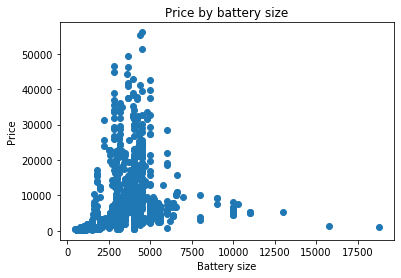

In [3]:
battery = data.battery_size.values
price = data.best_price.values
plt.scatter(battery, price)
plt.xlabel('Battery size')
plt.ylabel('Price')
plt.title('Price by battery size')

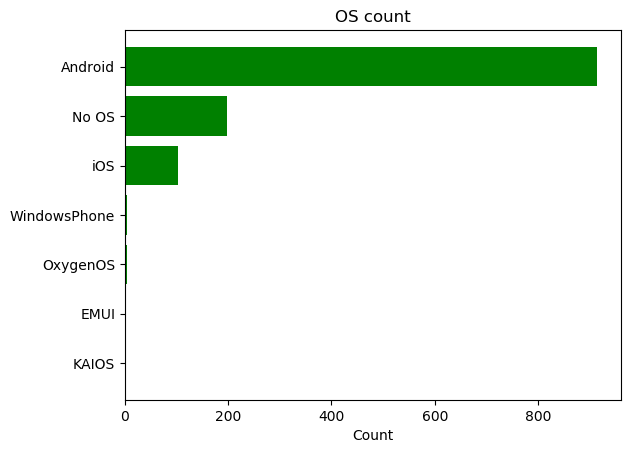

In [9]:
data2 = data.os.fillna(value='No OS')
os_values = np.unique(data2.values, return_counts=True)  
os_count = len(os_values[0]) 

plt.rcdefaults()
fig, ax = plt.subplots()

df = pd.DataFrame({
    'os': os_values[0],
    'counts': os_values[1]
}).sort_values(by=['counts'])

os = df.os[::-1]
counts = df.counts[::-1]

positions = np.arange(os_count)

ax.barh(positions, counts, align='center', color='green', ecolor='black')
ax.set_yticks(positions)
ax.set_yticklabels(os)
ax.invert_yaxis()  
ax.set_xlabel('Count')
ax.set_title('OS count')

plt.show()

Text(0.5, 1.0, 'Price by memory size')

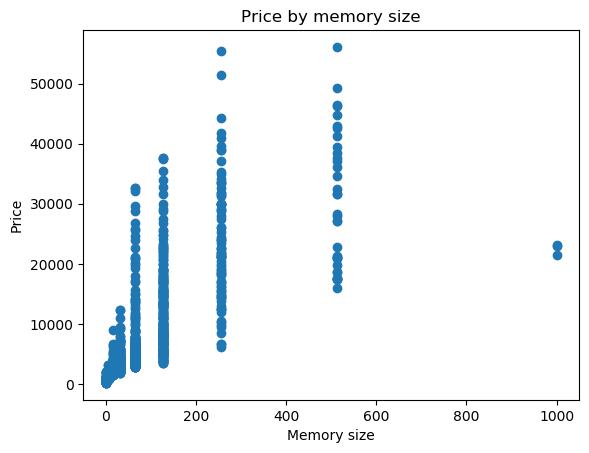

In [10]:
memory = data.memory_size.values
price = data.best_price.values
plt.scatter(memory, price)
plt.xlabel('Memory size')
plt.ylabel('Price')
plt.title('Price by memory size')